## IMPORT DATA

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers , Sequential 
from keras.layers import Dense

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## MELIHAT DATA NULL

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## DATA PROCESSING

In [5]:
gender_cat = pd.get_dummies(data['Gender'] , drop_first=True)
geo_cat = pd.get_dummies(data['Geography'] , drop_first=True)

data=pd.concat([data , gender_cat ,geo_cat] , axis=1)

## DROP DATA

In [6]:
data.drop(columns=['Gender', 'Geography' , 'RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True )

## DATA SPLIT

In [7]:
X = data.drop(['Exited'] , axis = 1)
y = data['Exited']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 , random_state=0)


## STANDARISASI DATA

In [9]:
ss = StandardScaler()

X_train[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']] = ss.fit_transform(X_train[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']])
X_test[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']] = ss.fit_transform(X_test[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']])


## MEMBUAT MODEL SEQUENTIAL

In [10]:
model = Sequential()

#Input Layer
model.add(Dense(64, activation='relu', input_shape = [11]))

#Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

#Output Layer
model.add(Dense(1,  activation = 'sigmoid'))

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17473 (68.25 KB)
Trainable params: 17473 (

## MENGGUNAKAN CALLBACK

In [18]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.87):
      self.model.stop_training = True

In [19]:
callback_function = MyCallback()

## PERMODELAN

In [20]:
history = model.fit(X_train, y_train, batch_size = 25, epochs = 20, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/20
280/280 [==============================] - 0s 694us/step - loss: 0.2427 - accuracy: 0.8966 - val_loss: 0.4297 - val_accuracy: 0.8560
Epoch 2/20
280/280 [==============================] - 0s 634us/step - loss: 0.2375 - accuracy: 0.8976 - val_loss: 0.4207 - val_accuracy: 0.8320
Epoch 3/20
280/280 [==============================] - 0s 628us/step - loss: 0.2305 - accuracy: 0.9021 - val_loss: 0.4568 - val_accuracy: 0.8423
Epoch 4/20
280/280 [==============================] - 0s 624us/step - loss: 0.2253 - accuracy: 0.9043 - val_loss: 0.4622 - val_accuracy: 0.8467
Epoch 5/20
280/280 [==============================] - 0s 623us/step - loss: 0.2157 - accuracy: 0.9077 - val_loss: 0.5004 - val_accuracy: 0.8420
Epoch 6/20
280/280 [==============================] - 0s 623us/step - loss: 0.2055 - accuracy: 0.9106 - val_loss: 0.5418 - val_accuracy: 0.8333
Epoch 7/20
280/280 [==============================] - 0s 622us/step - loss: 0.2039 - accuracy: 0.9057 - val_loss: 0.5513 - val_accuracy:

## EVALUASI MODEL

In [21]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 0s 308us/step


array([[6.69622570e-02],
       [2.36384161e-02],
       [1.01851495e-02],
       ...,
       [3.66018912e-06],
       [2.25378517e-02],
       [9.28608298e-01]], dtype=float32)

In [22]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print("Loss    : ", score[0])
print("Akurasi : ", score[1])

300/300 [==============================] - 0s 293us/step - loss: 0.8821 - accuracy: 0.8217
Loss    :  0.882125973701477
Akurasi :  0.8216666579246521


In [23]:
score1 = model.evaluate(X_train, y_train, batch_size = 10)
print("Loss    : ", score1[0])
print("Akurasi : ", score1[1])

700/700 [==============================] - 0s 275us/step - loss: 0.1219 - accuracy: 0.9501
Loss    :  0.12194371968507767
Akurasi :  0.9501428604125977


## AKURASI MODEL

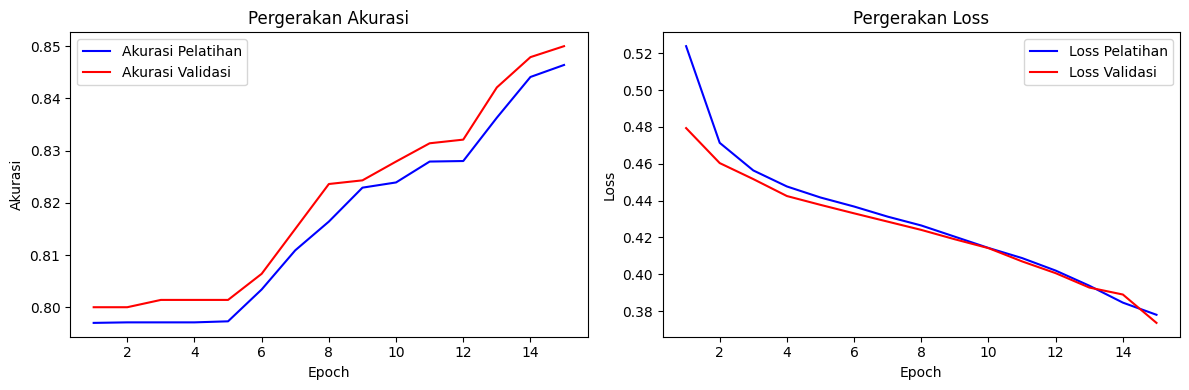

In [24]:
import matplotlib.pyplot as plt

# Contoh data akurasi dan loss pada tahap pelatihan dan validasi
train_accuracy = [0.7970, 0.7971, 0.7971, 0.7971, 0.7973, 0.8034, 0.8109, 0.8164, 0.8229, 0.8239, 0.8279, 0.8280, 0.8363, 0.8441, 0.8464]
val_accuracy = [0.8000, 0.8000, 0.8014, 0.8014, 0.8014, 0.8064, 0.8150, 0.8236, 0.8243, 0.8279, 0.8314, 0.8321, 0.8421, 0.8479, 0.8500]
train_loss = [0.5239, 0.4714, 0.4564, 0.4477, 0.4417, 0.4368, 0.4313, 0.4265, 0.4204, 0.4143, 0.4088, 0.4020, 0.3938, 0.3846, 0.3780]
val_loss = [0.4794, 0.4604, 0.4517, 0.4425, 0.4377, 0.4331, 0.4286, 0.4241, 0.4190, 0.4142, 0.4070, 0.4006, 0.3928, 0.3890, 0.3736]

epochs = range(1, len(train_accuracy) + 1)

# Membuat gambar dengan dua subplot
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Akurasi Pelatihan')
plt.plot(epochs, val_accuracy, 'r', label='Akurasi Validasi')
plt.title('Pergerakan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Loss Pelatihan')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi')
plt.title('Pergerakan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Mengatur subplot agar terlihat lebih baik
plt.show()